In [19]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

quakes = pd.read_csv('./data/earthquakes.csv')

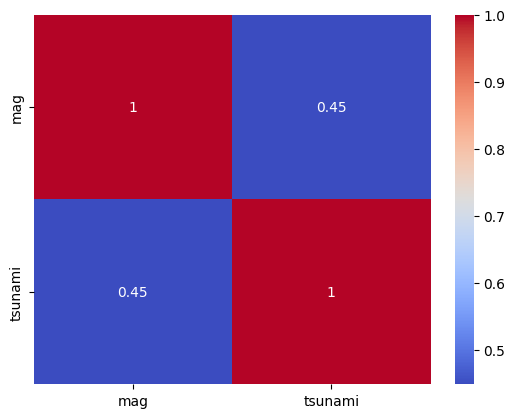

In [69]:
# Exercise 01
sns.heatmap(
    # filter quakes to only consider magType = mb
    # of the matching quakes, get correlation between mag and tsnumami
    quakes.query('magType == "mb"')[['mag','tsunami']].corr(), 
    # put numbers on each square; color the grid
    annot=True, cmap='coolwarm'
)

plt.savefig('./images/exercise01.png')

<Figure size 1200x600 with 0 Axes>

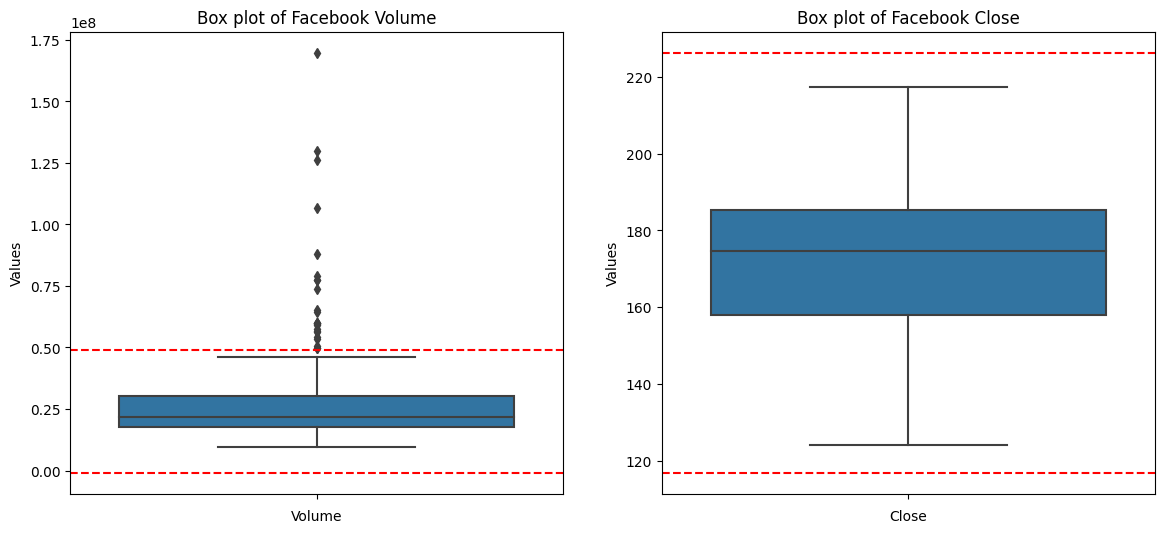

In [68]:
fb = pd.read_csv('./data/fb_stock_prices_2018.csv')
fb_melted = pd.melt(fb[['volume', 'close']], var_name='Variables', value_name='Values')


# create the subplots
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# sns.boxplot(ax=axes[0], y=fb['Values'][fb['Variables'] == 'volume'])
# sns.boxplot(ax=axes[1], y=fb['Values'][fb['Variables'] == 'close'])

# populate plot for each column, add tukey fence lines
for ax, var in zip(axes, ['volume', 'close']):
    sns.boxplot(ax=ax, y=fb_melted['Values'][fb_melted['Variables'] == var])
    
    # create bounds to be used for tukey
    Q1, Q3 = fb[var].quantile(0.25), fb[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # draw lines for tukey fence bound
    [ax.axhline(bound, color='r', linestyle='--') for bound in [lower_bound, upper_bound]]
    # featuring unnecessary list comp
    ax.set_title(f'Box plot of Facebook {var.title()}')
    ax.set_xlabel(var.title())
    ax.set_ylabel('Values')

plt.savefig('./images/exercise02.png')

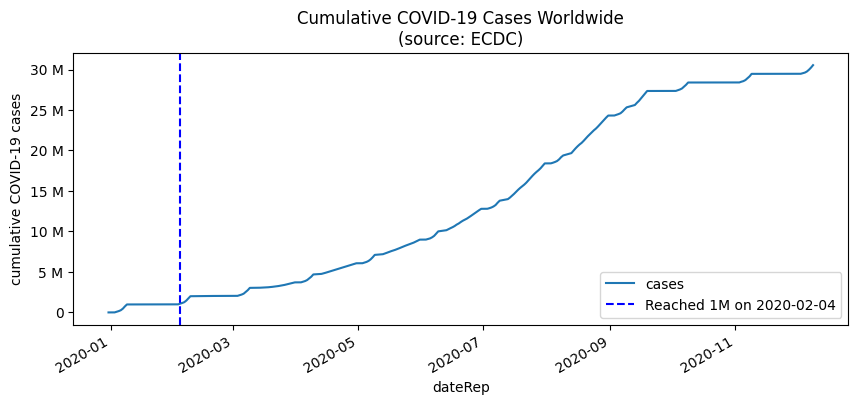

In [67]:
# Exercise 03
from matplotlib.ticker import EngFormatter

covid = pd.read_csv('./data/covid19_cases.csv')
covid['dateRep'] = pd.to_datetime(covid['dateRep'])
covid.set_index('dateRep', inplace=True)  # Setting dateRep as the index

# my method (without using Grouper) displays dates differently by default. i tried using
# an example from chapter 05 (monthly_ticks commented out below), but it doesnt cooperate
# with both cumulative_cases options i tested

# cumulative_cases = covid.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()
cumulative_cases = covid.groupby('dateRep')['cases'].sum().cumsum()

# they must be using a different data set because not only is the sampling much less frequent
# atleast from what i see, it only really moves for them inbetween March and April
# (next cell has proof)

ax = cumulative_cases.plot(title='Cumulative COVID-19 Cases Worldwide\n(source: ECDC)', figsize=(10, 4))
ax.set_ylabel('cumulative COVID-19 cases')
# engineering notation, auto makes the numbers easier to read
ax.yaxis.set_major_formatter(EngFormatter())

over_1M = cumulative_cases[cumulative_cases >= 1e6].index[0]
ax.axvline(over_1M, linestyle='dashed', color='b', label=f"Reached 1M on {over_1M.strftime('%Y-%m-%d')}")

# monthly_ticks = pd.date_range(start=covid.index.min(), end=covid.index.max(), freq='MS')
# ax.set_xticks(monthly_ticks)
# ax.set_xticklabels(monthly_ticks.strftime('%b %Y'), rotation=45)

plt.savefig('./images/exercise03.png')
ax.legend()

In [65]:
# print(cumulative_cases.iloc[::10])
print(cumulative_cases.iloc[30:33])

# date when solution example says that 1m is reached
print(cumulative_cases.loc['2020-04-03'])

dateRep
2020-02-02     996724
2020-02-03     998811
2020-02-04    1076284
Name: cases, dtype: int64
3716653
